In [107]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression, RANSACRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from itertools import chain
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [49]:
DATA_FILE = "../data/train_data.csv"
path = os.path.normpath(os.path.join(os.path.abspath(os.path.curdir), DATA_FILE))

In [50]:
train_data = pd.read_csv(path)
X = train_data.drop('is_acquired', axis=1)
Y = train_data['is_acquired']

<H3>Fullness of columns</H3>

In [51]:
X.notnull().mean()

company_id              1.000000
category_code           0.960513
country_code            1.000000
state_code              1.000000
average_funded          0.878784
total_rounds            1.000000
average_participants    1.000000
products_number         0.127042
offices                 0.932562
mba_degree              0.253809
phd_degree              0.085666
ms_degree               0.191961
other_degree            0.481320
ipo                     1.000000
is_closed               1.000000
age                     0.770915
dtype: float64

Degree columns are filled with zero. This value was choosen, because if we don't have an information about some degree category, we suppose that there is no people with that degree in a company.

In [52]:
mapper = DataFrameMapper([
    ('category_code', [CategoricalImputer()])
])
degree_columns = ['mba_degree', 'phd_degree', 'ms_degree', 'other_degree']
X.loc[:,degree_columns] = X[degree_columns].fillna(0)

In [53]:
data = pd.read_csv('/home/artem/Projects/wolf_of_crunchbase/data/data.csv')

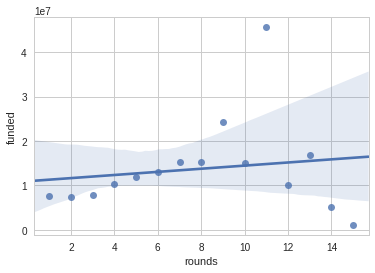

In [63]:
g = data.groupby('total_rounds').average_funded.mean()
dataframe = pd.DataFrame({'rounds': g.index, 'funded': g})
sns.regplot(x='rounds', y='funded', data=dataframe)

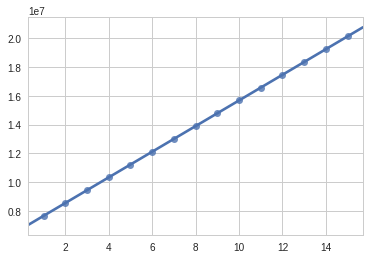

In [108]:
clf = RANSACRegressor()
clf.fit(dataframe.rounds.to_frame(), dataframe.funded.to_frame())
x_plot = [[i] for i in range(1, 16)]
y_plot = clf.predict(x_plot)
xs = np.array(list(chain(*x_plot)))
ys = np.array(list(chain(*y_plot)))
sns.regplot(x=xs, y=ys)

In [47]:
DATA_FILE = "../data/data.csv"
os.path.normpath(os.path.join(os.path.abspath(os.path.curdir), DATA_FILE))

'/home/artem/Projects/wolf_of_crunchbase/data/data.csv'